In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

In [6]:
name = ['tweet_id', 'entity', 'sentiment', 'tweet_content']
df_training = pd.read_csv('twitter_training.csv', names=name)
df_training.head()

,tweet_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df_training.shape

(74681, 4)

In [4]:
df_training.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    492
dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

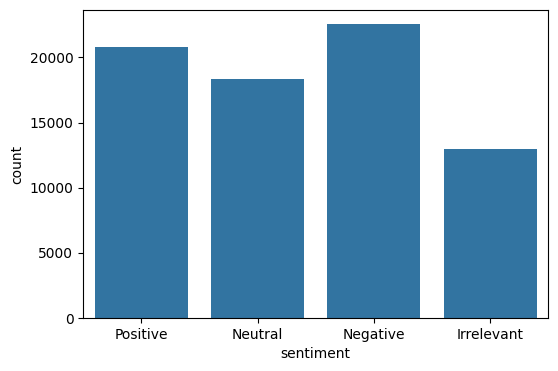

In [10]:
# plot sentiment graph
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment',data=df_training)

In [7]:
temp = df_training.groupby('sentiment').count()['tweet_id'].reset_index().sort_values(by='tweet_id',ascending=False)
temp.style.background_gradient()

,sentiment,tweet_id
1,Negative,22542
3,Positive,20832
2,Neutral,18318
0,Irrelevant,12990


In [ ]:
df_validation=pd.read_csv("twitter_validation.csv")
df_validation.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [ ]:
# Load the training and validation datasets without header
df_training = pd.read_csv('twitter_training.csv', header=None, names=['Tweet ID', 'entity', 'sentiment', 'Tweet content'])
df_validation = pd.read_csv('twitter_validation.csv', header=None, names=['Tweet ID', 'entity', 'sentiment', 'Tweet content'])

# Merge the two datasets
df = pd.concat([df_training, df_validation], ignore_index=True)

# Filter the dataset by 'Tweet content' for LeagueOfLegends
df_league_of_legends = df[df['entity'].str.contains('LeagueOfLegends', case=False, na=False)]

# Drop rows with missing values in 'Tweet content'
df_league_of_legends = df_league_of_legends.dropna(subset=['Tweet content'])

# Shuffle the dataset
df_league_of_legends = shuffle(df_league_of_legends, random_state=42)

# Split the dataset into training and validation sets
X = df_league_of_legends['Tweet content']
y = df_league_of_legends['sentiment']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Display information about the the resulting datasets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_validation))

Training set size: 1931
Validation set size: 483


In [ ]:
# Models
models = [
    MultinomialNB(),
    SVC(),
    RandomForestClassifier(),
    LogisticRegression(),
    GradientBoostingClassifier()
]

# Feature extraction methods
vectorizers = [
    ('TF-IDF', TfidfVectorizer()),
    ('Count Vectorizer', CountVectorizer())
]

# Example sentences
new_examples = [
    "I love playing League of Legends!",
    "This game is terrible. I hate it.",
    "Neutral tweet about League of Legends."
]

# Loop through models and vectorizers for training and evaluation
for model in models:
    for vectorizer_name, vectorizer in vectorizers:
        # Define a pipeline with feature engineering and a machine learning algorithm
        pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', model)
        ])

        # Train the model
        pipeline.fit(X_train, y_train)

        # Evaluate the model
        y_pred = pipeline.predict(X_validation)
        accuracy = accuracy_score(y_validation, y_pred)
        report = classification_report(y_validation, y_pred)

        # Display results
        print(f"\nModel: {model.__class__.__name__}, Vectorizer: {vectorizer_name}")
        print("Accuracy:", accuracy)
        print("Classification Report:\n", report)

        # Predict the sentiment of new examples
        predicted_sentiments = pipeline.predict(new_examples)
        for example, sentiment in zip(new_examples, predicted_sentiments):
            print(f"Example: '{example}' - Predicted Sentiment: {sentiment}")
        print("\n------------------------------------------------------------------------------------")


Model: MultinomialNB, Vectorizer: TF-IDF
Accuracy: 0.8902691511387164
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       1.00      0.52      0.68        66
    Negative       0.86      0.97      0.91       117
     Neutral       0.86      0.96      0.91       175
    Positive       0.95      0.92      0.93       125

    accuracy                           0.89       483
   macro avg       0.92      0.84      0.86       483
weighted avg       0.90      0.89      0.88       483

Example: 'I love playing League of Legends!' - Predicted Sentiment: Positive
Example: 'This game is terrible. I hate it.' - Predicted Sentiment: Negative
Example: 'Neutral tweet about League of Legends.' - Predicted Sentiment: Negative

------------------------------------------------------------------------------------

Model: MultinomialNB, Vectorizer: Count Vectorizer
Accuracy: 0.927536231884058
Classification Report:
               precision    recall  f1-score 

In [12]:
''''y_pred_probs = pipeline.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()'''

NameError: name 'pipeline' is not defined